In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import glob

# SAVING ADDRESSES OF DATASETS & ADDING .TXT EXTENSION TO IT
all_files = os.listdir("/content/gdrive/My Drive/App Dataset/App Dataset/Dataset/B/sys/")  
txt_files = glob.glob("/content/gdrive/My Drive/App Dataset/App Dataset/Dataset/B/sys/*.txt")

all_filesM = os.listdir("/content/gdrive/My Drive/App Dataset/App Dataset/Dataset/M/sys/")  
txt_filesM = glob.glob("/content/gdrive/My Drive/App Dataset/App Dataset/Dataset/M/sys/*.txt")

In [9]:
# Function to read the text document and return a list containg all the lines in the document
def wordsInFile(k):
  with open(k, 'rt') as fd:
    lines1 = fd.readlines()
  return lines1

# Function to return pandas data frame with tf idf values for each feature in feature vector corressponding to each document
def CreateDataFrame(vectors,vectorizer):
  feature_names = vectorizer.get_feature_names()
  dense = vectors.todense()
  denselist = dense.tolist()
  df = pd.DataFrame(denselist, columns=feature_names)
  return df, denselist

# Function to return evaluation metrics of a machine learning model
def EvaluationMetrics(y_test,svm_predict):
  Accuracy = accuracy_score(y_test, svm_predict)
  Precision = precision_score(y_test, svm_predict)
  Recall = recall_score(y_test, svm_predict)
  F1 = f1_score(y_test, svm_predict)
  return Accuracy, Precision, Recall, F1

def PrecisionRecallCurve(X_test, y_test, X_train, y_train,clf):
  y_scores_clf = clf.fit(X_train, y_train).decision_function(X_test)
  precision, recall, thresholds = precision_recall_curve(y_test, y_scores_clf)
  closest_zero = np.argmin(np.abs(thresholds))
  closest_zero_p = precision[closest_zero]
  closest_zero_r = recall[closest_zero]
  plt.figure()
  plt.plot(precision, recall)
  plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 8)
  plt.xlabel('Precision')
  plt.ylabel('Recall')
  plt.title('Precision-Recall Curve')
  plt.show()
  return
def ROCCurve(X_test, y_test, X_train, y_train,clf):
  y_scores_clf = clf.fit(X_train, y_train).decision_function(X_test)
  fpr_clf, tpr_clf, _ = roc_curve(y_test, y_scores_clf)
  roc_auc_clf = auc(fpr_clf, tpr_clf)
  plt.figure()
  plt.plot(fpr_clf, tpr_clf, lw=3)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve')
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.show()
  return

#1 WORD - TFIDF

In [14]:
kk1=[]
# Each document is converted into a string and is stored in the list kk1

# Storing documents of class 'B'
for ii in range(np.size(txt_files)):
  s=wordsInFile(txt_files[ii])
  # Converting list of words in the given document into a string
  listToStr1 = ' '.join(s)
  kk1.append(listToStr1)

# Storing documents of class 'M'
for ii in range(np.size(txt_filesM)):
  s=wordsInFile(txt_filesM[ii])
  listToStr11 = ' '.join(s)
  kk1.append(listToStr11)

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(kk1)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df

,_llseek,bind,capget,clock_gettime,clone,close,connect,dup,epoll_create1,epoll_ctl,epoll_pwait,eventfd2,faccessat,fchmod,fchmodat,fcntl,fcntl64,fdatasync,flock,fstat,fstat64,fstatat64,fsync,ftruncate,ftruncate64,futex,getcwd,getdents64,getegid,getegid32,geteuid,geteuid32,getpid,getppid,getpriority,getrlimit,getsockname,getsockopt,gettid,gettimeofday,...,openat,pipe2,ppoll,prctl,pread,pread64,pwrite,pwrite64,read,readlinkat,recvfrom,renameat,rt_sigaction,rt_sigprocmask,rt_sigreturn,sched_getparam,sched_getscheduler,sched_yield,sendmsg,sendto,setpriority,setrlimit,setsockopt,shutdown,sigaction,sigreturn,socket,socketpair,stat64,statfs,statfs64,tgkill,tkill,ugetrlimit,uname,unlinkat,utimensat,wait4,write,writev
0,0.0,0.0,0.0,0.000000,0.000000,0.002278,0.0,0.000275,0.0,0.000700,0.007182,0.0,0.000066,0.0,0.000000,0.000256,0.000000,0.0,0.000000,0.000401,0.000000,0.000000,0.000000,0.000000,0.0,0.001615,0.0,0.000000,0.0,0.0,0.000149,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.001628,0.0,0.000000,0.000021,0.999672,0.000000,0.0,0.0,0.001718,0.000000,0.012307,0.000000,0.000000,0.005320,0.000030,0.0,0.0,0.000218,0.000000,0.010450,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.005011,0.004242
1,0.0,0.0,0.0,0.000000,0.002044,0.047800,0.0,0.006314,0.0,0.012594,0.437111,0.0,0.000677,0.0,0.000798,0.007281,0.000000,0.0,0.000000,0.014748,0.000000,0.000000,0.000446,0.000000,0.0,0.103001,0.0,0.000426,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000461,0.0,0.0,0.0,0.000000,...,0.036896,0.0,0.000000,0.000769,0.052988,0.000000,0.0,0.0,0.256250,0.000199,0.435071,0.000736,0.000000,0.074699,0.173639,0.0,0.0,0.000800,0.000263,0.351294,0.000618,0.000315,0.0,0.0,0.0,0.0,0.0,0.000401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000945,0.0,0.0,0.226358,0.053246
2,0.0,0.0,0.0,0.963973,0.000181,0.006951,0.0,0.002163,0.0,0.006890,0.054119,0.0,0.000126,0.0,0.000000,0.000000,0.006692,0.0,0.000000,0.000000,0.000645,0.003586,0.000000,0.000000,0.0,0.004342,0.0,0.004651,0.0,0.0,0.000000,0.0,0.0,0.002696,0.0,0.000000,0.0,0.0,0.0,0.012971,...,0.001780,0.0,0.000000,0.000123,0.000000,0.029083,0.0,0.0,0.016264,0.000000,0.138039,0.000000,0.000000,0.005915,0.000085,0.0,0.0,0.003763,0.000000,0.130714,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001190,0.0,0.0,0.034036,0.023526
3,0.0,0.0,0.0,0.000000,0.006893,0.092947,0.0,0.009260,0.0,0.027104,0.201025,0.0,0.001447,0.0,0.001023,0.018794,0.000000,0.0,0.000000,0.017584,0.000000,0.000000,0.000000,0.000000,0.0,0.040460,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000492,0.0,0.0,0.0,0.000000,...,0.068916,0.0,0.000702,0.000470,0.156429,0.000000,0.0,0.0,0.065687,0.000000,0.495856,0.000000,0.001388,0.188174,0.000000,0.0,0.0,0.057786,0.000000,0.453239,0.000881,0.000000,0.0,0.0,0.0,0.0,0.0,0.000429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.148029,0.086864
4,0.0,0.0,0.0,0.000000,0.000000,0.024394,0.0,0.004288,0.0,0.010772,0.383720,0.0,0.000642,0.0,0.000000,0.005177,0.000000,0.0,0.009895,0.002601,0.000000,0.000000,0.002537,0.006232,0.0,0.027703,0.0,0.002424,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.013957,0.0,0.000000,0.000000,0.143370,0.000000,0.0,0.0,0.166290,0.000000,0.585699,0.000000,0.000000,0.053889,0.000000,0.0,0.0,0.000000,0.000000,0.397810,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004031,0.0,0.0,0.283291,0.108389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,0.0,0.0,0.0,0.000000,0.000243,0.017372,0.0,0.006604,0.0,0.010490,0.283274,0.0,0.000255,0.0,0.000000,0.004344,0.000000,0.0,0.000000,0.000258,0.000000,0.000000,0.000000,0.000000,0.0,0.003263,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00

LINEAR SVC MODEL

In [21]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)
# F1 = 2 * Precision * Recall / (Precision + Recall)

# Class B is labelled as 0 & Class M is labelled as 1
# No of samples = 5822
# size of feature vector = 102
y=np.zeros((5822,))
y[int(np.size(txt_files)):5822]=1
X=denselist

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = LinearSVC(C=9).fit(X_train, y_train)

print('Accuracy of Linear SVC classifier on training set:',clf.score(X_train, y_train))
print('Accuracy of Linear SVC classifier on test set:',clf.score(X_test, y_test))

svm_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)
print('\n Confusion matrix for SVM classifier (linear, C=9)\n', confusion)

Accuracy, Precision, Recall, F1 = EvaluationMetrics(y_test,svm_predicted)
print('\n Accuracy:',Accuracy,'\n Precision:',Precision,'\n Recall:',Recall,'\n F1:',F1)

Accuracy of Linear SVC classifier on training set: 0.9244159413650939
Accuracy of Linear SVC classifier on test set: 0.9093406593406593

 Confusion matrix for SVM classifier (linear, C=9)
 [[564  46]
 [ 86 760]]

 Accuracy: 0.9093406593406593 
 Precision: 0.9429280397022333 
 Recall: 0.8983451536643026 
 F1: 0.9200968523002422


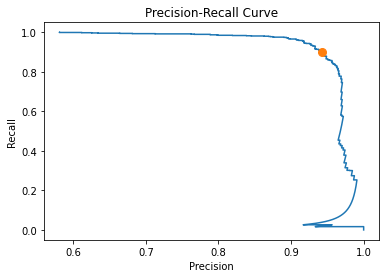

In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

PrecisionRecallCurve(X_test, y_test, X_train, y_train,clf)

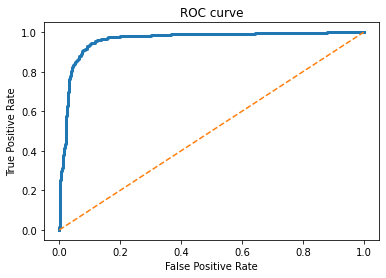

In [25]:
ROCCurve(X_test, y_test, X_train, y_train,clf)

KERNEL SVC MODEL

In [22]:
clfrbf = SVC(kernel = 'rbf', gamma = 7,C = 9).fit(X_train, y_train)

print('Accuracy of kernel SVC classifier on training set:',clfrbf.score(X_train, y_train))
print('Accuracy of kernel SVC classifier on test set:',clfrbf.score(X_test, y_test))

svm_predicted1 = clfrbf.predict(X_test)
confusion1 = confusion_matrix(y_test, svm_predicted1)

print('\n Confusion matrix for SVM classifier (RBF kernel, C=9, gamma=7)\n', confusion1)

Accuracy_rbf, Precision_rbf, Recall_rbf, F1_rbf = EvaluationMetrics(y_test,svm_predicted1)
print('\n Accuracy:',Accuracy_rbf,'\n Precision:',Precision_rbf,'\n Recall:',Recall_rbf,'\n F1:',F1_rbf)

Accuracy of kernel SVC classifier on training set: 0.972972972972973
Accuracy of kernel SVC classifier on test set: 0.9471153846153846

 Confusion matrix for SVM classifier (RBF kernel, C=9, gamma=7)
 [[571  39]
 [ 38 808]]

 Accuracy: 0.9471153846153846 
 Precision: 0.9539551357733176 
 Recall: 0.9550827423167849 
 F1: 0.9545186060248081


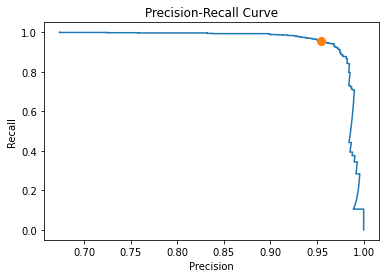

In [26]:
PrecisionRecallCurve(X_test, y_test, X_train, y_train,clfrbf)

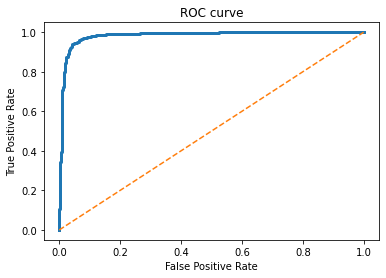

In [27]:
ROCCurve(X_test, y_test, X_train, y_train, clfrbf)

#1 WORD - BOOLEAN

In [37]:
#  Creating a matrix for boolean occurence of calls
boolean=np.zeros([5822,102])
for ii in range(5822):
  for jj in range(102):
    if denselist[ii][jj]>0.0:
      boolean[ii][jj]=1
    else:
      boolean[ii][jj]=0

X1=boolean
X_trainB, X_testB, y_trainB, y_testB = train_test_split(X1, y, random_state = 0)

clf2 = LinearSVC(C=2).fit(X_trainB, y_trainB)
print('Accuracy of Linear SVC classifier on training set:',clf2.score(X_trainB, y_trainB))
print('Accuracy of Linear SVC classifier on test set:',clf2.score(X_testB, y_testB))

svm_predicted2 = clf2.predict(X_testB)
confusion2 = confusion_matrix(y_testB, svm_predicted2)

print('\n Confusion matrix for SVM classifier (linear, C=9)\n', confusion2)

AccuracyB, PrecisionB, RecallB, F1B = EvaluationMetrics(y_testB,svm_predicted2)
print('\n Accuracy:',AccuracyB,'\n Precision:',PrecisionB,'\n Recall:',RecallB,'\n F1:',F1B)

Accuracy of Linear SVC classifier on training set: 0.9040311497938617
Accuracy of Linear SVC classifier on test set: 0.8887362637362637

 Confusion matrix for SVM classifier (linear, C=9)
 [[513  97]
 [ 65 781]]

 Accuracy: 0.8887362637362637 
 Precision: 0.8895216400911162 
 Recall: 0.9231678486997635 
 F1: 0.9060324825986079


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


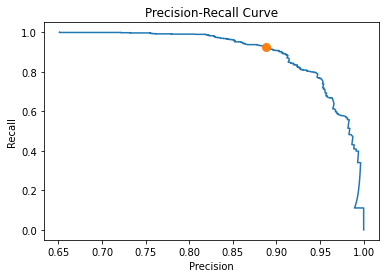

In [30]:
PrecisionRecallCurve(X_testB, y_testB, X_trainB, y_trainB, clf2)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


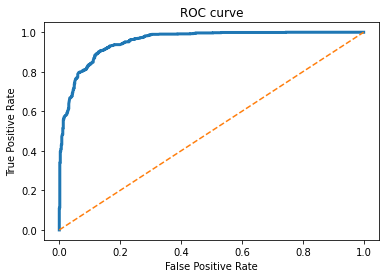

In [31]:
ROCCurve(X_testB, y_testB, X_trainB, y_trainB, clf2)

In [32]:
clfrbf2 = SVC(kernel = 'rbf', gamma = 0.1,C = 0.9).fit(X_trainB, y_trainB)

print('Accuracy of Linear SVC classifier on training set:',clfrbf2.score(X_trainB, y_trainB))
print('Accuracy of Linear SVC classifier on test set:',clfrbf2.score(X_testB, y_testB))

svm_predicted11 = clfrbf2.predict(X_testB)
confusion11 = confusion_matrix(y_testB, svm_predicted11)

print('\n Confusion matrix for SVM classifier (RBF kernel, C=0.1, gamma=0.9)\n', confusion11)

Accuracy_rbfB, Precision_rbfB, Recall_rbfB, F1_rbfB = EvaluationMetrics(y_testB,svm_predicted11)
print('\n Accuracy:',Accuracy_rbfB,'\n Precision:',Precision_rbfB,'\n Recall:',Recall_rbfB,'\n F1:',F1_rbfB)

Accuracy of Linear SVC classifier on training set: 0.913421896472744
Accuracy of Linear SVC classifier on test set: 0.9010989010989011

 Confusion matrix for SVM classifier (RBF kernel, C=0.1, gamma=0.9)
 [[527  83]
 [ 61 785]]

 Accuracy: 0.9010989010989011 
 Precision: 0.9043778801843319 
 Recall: 0.9278959810874704 
 F1: 0.9159859976662778


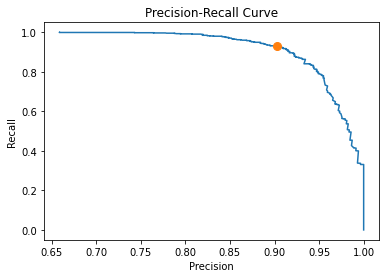

In [33]:
PrecisionRecallCurve(X_testB, y_testB, X_trainB, y_trainB, clfrbf2)

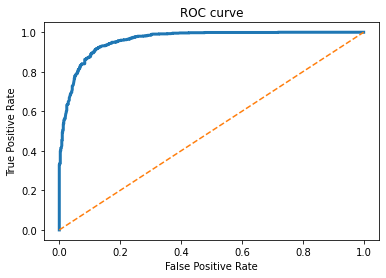

In [34]:
ROCCurve(X_testB, y_testB, X_trainB, y_trainB, clfrbf2)

#2 WORD - TFIDF

In [35]:
khg11=[]
for ii in range(np.size(txt_files)):
  kh1=[]
  hh=wordsInFile(txt_files[ii])
  for jj in range(1,np.size(hh)):
    a=[hh[jj],hh[jj-1]]
    bb= '-'.join(a)
    kh1.append(bb)
  khg1 = ' '.join(kh1)
  khg1=khg1.replace('\n','')
  khg11.append(khg1)

for ii in range(np.size(txt_filesM)):
  kh12=[]
  hh2=wordsInFile(txt_filesM[ii])
  for jj in range(1,np.size(hh2)):
    a2=[hh2[jj],hh2[jj-1]]
    bb2= '-'.join(a2)
    kh12.append(bb2)
  khg12 = ' '.join(kh12)
  khg12=khg12.replace('\n','')
  khg11.append(khg12)

vectorizer = TfidfVectorizer(ngram_range=(2,2))
vectors3 = vectorizer.fit_transform(khg11)
feature_names3 = vectorizer.get_feature_names()
dense3 = vectors3.todense()
denselist4 = dense3.tolist()
dff1 = pd.DataFrame(denselist4, columns=feature_names3)
dff1

,_llseek _llseek,_llseek clock_gettime,_llseek close,_llseek epoll_pwait,_llseek fcntl64,_llseek fstat64,_llseek fstatat64,_llseek fsync,_llseek ftruncate64,_llseek futex,_llseek geteuid32,_llseek gettimeofday,_llseek ioctl,_llseek lseek,_llseek madvise,_llseek mlock,_llseek mmap2,_llseek mprotect,_llseek munlock,_llseek munmap,_llseek openat,_llseek pread64,_llseek read,_llseek renameat,_llseek rt_sigprocmask,_llseek rt_sigreturn,_llseek unlinkat,_llseek write,_llseek writev,bind connect,bind fcntl,bind futex,bind getsockname,bind getsockopt,bind ioctl,bind listen,bind read,bind setsockopt,bind socket,bind write,...,writev lseek,writev madvise,writev mkdirat,writev mmap,writev mmap2,writev mprotect,writev mremap,writev munmap,writev newfstatat,writev openat,writev pipe2,writev ppoll,writev prctl,writev pread,writev pread64,writev pwrite,writev pwrite64,writev read,writev readlinkat,writev recvfrom,writev renameat,writev rt_sigaction,writev rt_sigprocmask,writev rt_sigreturn,writev sched_yield,writev sendmsg,writev sendto,writev setpriority,writev setrlimit,writev setsockopt,writev shutdown,writev socket,writev socketpair,writev statfs,writev statfs64,writev unlinkat,writev utimensat,writev wait4,writev write,writev writev
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000023,0.0,0.000054,0.000000,0.000019,0.0,0.0,0.000042,0.000067,0.000000,0.0,0.0,0.000011,0.0,0.000561,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000165,0.002175
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000233,0.0,0.000390,0.0,0.000808,0.0,0.000258,0.000118,0.000140,0.0,0.0,0.000000,0.000720,0.000000,0.0,0.0,0.000320,0.0,0.010423,0.000000,0.000000,0.000000,0.002243,0.0,0.0,0.003992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000289,0.0,0.0,0.001321,0.041303
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000080,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000372,0.0,0.0,0.000000,0.0,0.001724,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000048,0.009877
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.001725,0.0,0.003218,0.0,0.001714,0.000784,0.000309,0.0,0.0,0.000000,0.002124,0.000000,0.0,0.0,0.001418,0.0,0.017667,0.000000,0.000530,0.000423,0.000000,0.0,0.0,0.014283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.002770,0.061381
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000991,0.0,0.003080,0.0,0.000000,0.000901,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000611,0.0,0.033207,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.039070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.012196,0.094506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.001827,0.0,0.000365,0.000000,0.000000,0.0,0.0,0.000000,0.000905,0.000000,0.0,0.0,0.000227,0.0,0.038436,0.000000,0.000000,0.

In [40]:
y=np.zeros((5822,))
y[2475:5822]=1
X=denselist4

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = LinearSVC(C=7).fit(X_train, y_train)

print('Accuracy of Linear SVC classifier on training set:',clf.score(X_train, y_train))
print('Accuracy of Linear SVC classifier on test set:',clf.score(X_test, y_test))

svm_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)
print('\n Confusion matrix for SVM classifier (linear, C=7)\n', confusion2)

Accuracy2, Precision2, Recall2, F12 = EvaluationMetrics(y_test,svm_predicted)
print('\n Accuracy:',Accuracy2,'\n Precision:',Precision2,'\n Recall:',Recall2,'\n F1:',F12)

Accuracy of Linear SVC classifier on training set: 0.9649564819056344
Accuracy of Linear SVC classifier on test set: 0.9615384615384616

 Confusion matrix for SVM classifier (linear, C=7)
 [[513  97]
 [ 65 781]]

 Accuracy: 0.9615384615384616 
 Precision: 0.9770531400966184 
 Recall: 0.9562647754137116 
 F1: 0.966547192353644


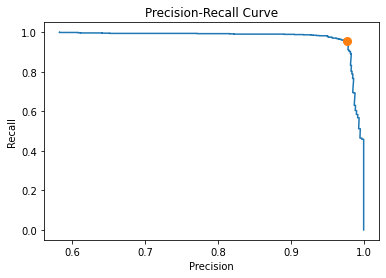

In [41]:
PrecisionRecallCurve(X_test, y_test, X_train, y_train,clf)

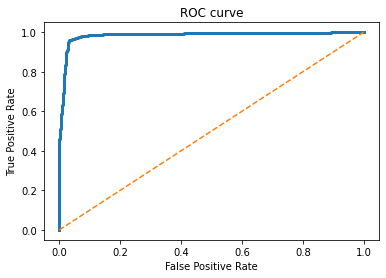

In [42]:
ROCCurve(X_test, y_test, X_train, y_train,clf)

In [45]:
clfrbf = SVC(kernel = 'rbf', gamma = 1,C = 7).fit(X_train, y_train)

print('Accuracy of kernel SVC classifier on training set:',clfrbf.score(X_train, y_train))
print('Accuracy of kernel SVC classifier on test set:',clfrbf.score(X_test, y_test))

svm_predicted1 = clfrbf.predict(X_test)
confusion1 = confusion_matrix(y_test, svm_predicted1)

print('\n Confusion matrix for SVM classifier (RBF kernel, C=7, gamma=1)\n', confusion1)

Accuracy_rbf2, Precision_rbf2, Recall_rbf2, F1_rbf2 = EvaluationMetrics(y_test,svm_predicted1)
print('\n Accuracy:',Accuracy_rbf2,'\n Precision:',Precision_rbf2,'\n Recall:',Recall_rbf2,'\n F1:',F1_rbf2)

Accuracy of kernel SVC classifier on training set: 0.9688502061383417
Accuracy of kernel SVC classifier on test set: 0.9574175824175825

 Confusion matrix for SVM classifier (RBF kernel, C=7, gamma=1)
 [[583  27]
 [ 35 811]]

 Accuracy: 0.9574175824175825 
 Precision: 0.9677804295942721 
 Recall: 0.958628841607565 
 F1: 0.9631828978622328


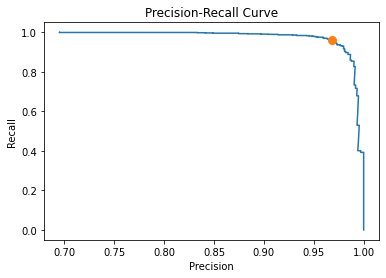

In [46]:
PrecisionRecallCurve(X_test, y_test, X_train, y_train,clfrbf)

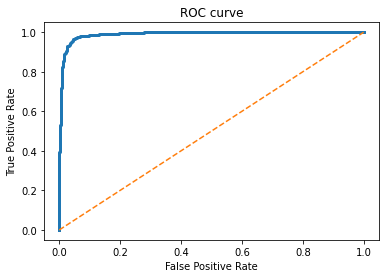

In [48]:
ROCCurve(X_test, y_test, X_train, y_train,clfrbf)

#2 WORD- BOOLEAN

In [50]:
boolean1=np.zeros([5822,3199])
for ii in range(5822):
  for jj in range(3199):
    if denselist4[ii][jj]>0.0:
      boolean1[ii][jj]=1
    else:
      boolean1[ii][jj]=0

X1=boolean1
X_trainB, X_testB, y_trainB, y_testB = train_test_split(X1, y, random_state = 0)

clf2 = LinearSVC(C=1).fit(X_trainB, y_trainB)
print('Accuracy of Linear SVC classifier on training set:',clf2.score(X_trainB, y_trainB))
print('Accuracy of Linear SVC classifier on test set:',clf2.score(X_testB, y_testB))

svm_predicted2 = clf2.predict(X_testB)
confusion2 = confusion_matrix(y_testB, svm_predicted2)

print('\n Confusion matrix for SVM classifier (linear, C=1)\n', confusion2)

Accuracy2B, Precision2B, Recall2B, F12B = EvaluationMetrics(y_testB,svm_predicted2)
print('\n Accuracy:',Accuracy2B,'\n Precision:',Precision2B,'\n Recall:',Recall2B,'\n F1:',F12B)

Accuracy of Linear SVC classifier on training set: 1.0
Accuracy of Linear SVC classifier on test set: 0.9684065934065934

 Confusion matrix for SVM classifier (linear, C=1)
 [[583  27]
 [ 19 827]]

 Accuracy: 0.9684065934065934 
 Precision: 0.968384074941452 
 Recall: 0.9775413711583925 
 F1: 0.9729411764705882


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


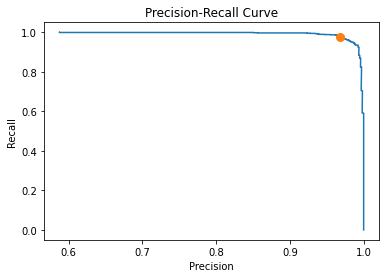

In [51]:
PrecisionRecallCurve(X_testB, y_testB, X_trainB, y_trainB, clf2)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


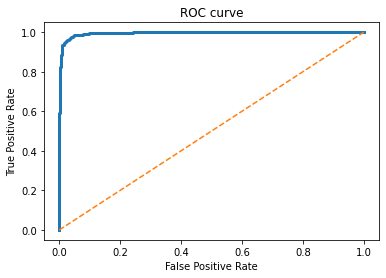

In [52]:
ROCCurve(X_testB, y_testB, X_trainB, y_trainB, clf2)

In [54]:
clfrbf2 = SVC(kernel = 'rbf', gamma = 0.1,C = 0.9).fit(X_trainB, y_trainB)

print('Accuracy of Linear SVC classifier on training set:',clfrbf2.score(X_trainB, y_trainB))
print('Accuracy of Linear SVC classifier on test set:',clfrbf2.score(X_testB, y_testB))

svm_predicted11 = clfrbf2.predict(X_testB)
confusion11 = confusion_matrix(y_testB, svm_predicted11)

print('\n Confusion matrix for SVM classifier (RBF kernel, C=0.1, gamma=0.9)\n', confusion11)

Accuracy_rbf2B, Precision_rbf2B, Recall_rbf2B, F1_rbf2B = EvaluationMetrics(y_testB,svm_predicted11)
print('\n Accuracy:',Accuracy_rbf2B,'\n Precision:',Precision_rbf2B,'\n Recall:',Recall_rbf2B,'\n F1:',F1_rbf2B)

Accuracy of Linear SVC classifier on training set: 1.0
Accuracy of Linear SVC classifier on test set: 0.584478021978022

 Confusion matrix for SVM classifier (RBF kernel, C=0.1, gamma=0.9)
 [[  5 605]
 [  0 846]]

 Accuracy: 0.584478021978022 
 Precision: 0.5830461750516885 
 Recall: 1.0 
 F1: 0.7366129734436221


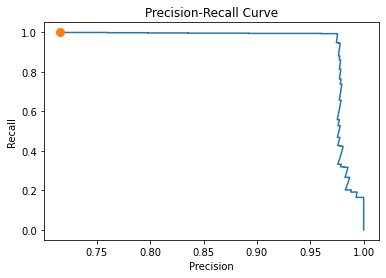

In [55]:
PrecisionRecallCurve(X_testB, y_testB, X_trainB, y_trainB, clfrbf2)

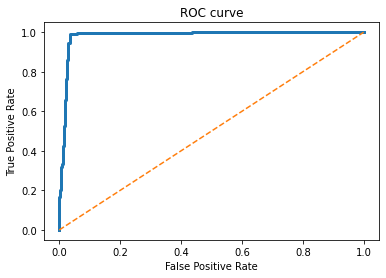

In [56]:
ROCCurve(X_testB, y_testB, X_trainB, y_trainB, clfrbf2)

#3 WORD - TFIDF

In [5]:
khgg11=[]
for ii in range(0,int(np.size(txt_files)/2) -20):
  khgg1=[]
  hhh=wordsInFile(txt_files[ii])
  for jj in range(2,int(np.size(hhh))):
    a=[hhh[jj],hhh[jj-1],hhh[jj-2]]
    bb= '-'.join(a)
    khgg1.append(bb)
  khgg1 = ' '.join(khgg1)
  khgg1=khgg1.replace('\n','')
  khgg11.append(khgg1)

for ii in range(0,int(np.size(txt_filesM)/2)-20):
  khgg12=[]
  hhh=wordsInFile(txt_filesM[ii])
  for jj in range(2,int(np.size(hhh))):
    a=[hhh[jj],hhh[jj-1],hhh[jj-2]]
    bb= '-'.join(a)
    khgg12.append(bb)
  khgg12 = ' '.join(khgg12)
  khgg12=khgg12.replace('\n','')
  khgg11.append(khgg12)

vectorizer11 = TfidfVectorizer(ngram_range=(3,3))
vectors112 = vectorizer11.fit_transform(khgg11)
feature_names112 = vectorizer11.get_feature_names()
dense112 = vectors112.todense()
denselist112 = dense112.tolist()
dff112 = pd.DataFrame(denselist112,columns=feature_names112)
dff112

,_llseek _llseek _llseek,_llseek _llseek clock_gettime,_llseek _llseek close,_llseek _llseek fcntl64,_llseek _llseek fstat64,_llseek _llseek fstatat64,_llseek _llseek fsync,_llseek _llseek futex,_llseek _llseek ioctl,_llseek _llseek lseek,_llseek _llseek madvise,_llseek _llseek mmap2,_llseek _llseek munmap,_llseek _llseek openat,_llseek _llseek pread64,_llseek _llseek read,_llseek _llseek write,_llseek clock_gettime _llseek,_llseek clock_gettime clock_gettime,_llseek clock_gettime close,_llseek clock_gettime fcntl64,_llseek clock_gettime fstat64,_llseek clock_gettime fsync,_llseek clock_gettime mmap2,_llseek clock_gettime mprotect,_llseek clock_gettime write,_llseek close _llseek,_llseek close clock_gettime,_llseek close fcntl64,_llseek close fsync,_llseek close mmap2,_llseek close openat,_llseek close pread64,_llseek close read,_llseek close rt_sigprocmask,_llseek epoll_pwait epoll_pwait,_llseek epoll_pwait openat,_llseek faccessat _llseek,_llseek fcntl64 clock_gettime,_llseek fcntl64 fcntl64,...,writev writev getdents64,writev writev getpriority,writev writev getrlimit,writev writev getsockname,writev writev gettid,writev writev gettimeofday,writev writev getuid,writev writev getuid32,writev writev ioctl,writev writev lseek,writev writev madvise,writev writev mkdirat,writev writev mmap,writev writev mprotect,writev writev munmap,writev writev newfstatat,writev writev openat,writev writev pipe2,writev writev prctl,writev writev pread,writev writev pread64,writev writev pwrite,writev writev read,writev writev recvfrom,writev writev renameat,writev writev rt_sigaction,writev writev rt_sigprocmask,writev writev rt_sigreturn,writev writev sched_yield,writev writev sendmsg,writev writev sendto,writev writev setpriority,writev writev setsockopt,writev writev socket,writev writev socketpair,writev writev statfs,writev writev unlinkat,writev writev wait4,writev writev write,writev writev writev
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000029,0.0,0.000044,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000009,0.000120,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000082,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000005,0.001036
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001890,0.0,0.000557,0.0,0.000111,0.0,0.000000,0.000366,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.004565,0.0,0.00000,0.000000,0.0,0.0,0.0,0.003107,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000435,0.034956
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000057
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001945,0.0,0.001325,0.0,0.000000,0.0,0.000323,0.000798,0.000906,0.00022,0.0,0.0,0.0,0.001595,0.0,0.0,0.000981,0.007787,0.0,0.00037,0.000435,0.0,0.0,0.0,0.004915,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000813,0.045275
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001443,0.0,0.000928,0.0,0.000000,0.0,0.000000,0.002682,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.013181,0.0,0.00000,0.000000,0.0,0.0,0.0,0.007803,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.001709,0.099784
...,...,...,...,...,...,...,...,...,...

In [7]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y=np.zeros((2870,))
y[int(np.size(txt_files)/2) -20:2870]=1
X=denselist112
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = LinearSVC(C=9).fit(X_train, y_train)

print('Accuracy of Linear SVC classifier on training set:',clf.score(X_train, y_train))
print('Accuracy of Linear SVC classifier on test set:',clf.score(X_test, y_test))

svm_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)
print('\n Confusion matrix for SVM classifier (linear, C=9)\n', confusion)

Accuracy3, Precision3, Recall3, F13 = EvaluationMetrics(y_test,svm_predicted)
print('\n Accuracy:',Accuracy3,'\n Precision:',Precision3,'\n Recall:',Recall3,'\n F1:',F13)

Accuracy of Linear SVC classifier on training set: 0.9725836431226765
Accuracy of Linear SVC classifier on test set: 0.947075208913649

 Confusion matrix for SVM classifier (linear, C=9)
 [[299  13]
 [ 25 381]]

 Accuracy: 0.947075208913649 
 Precision: 0.9670050761421319 
 Recall: 0.9384236453201971 
 F1: 0.9524999999999999


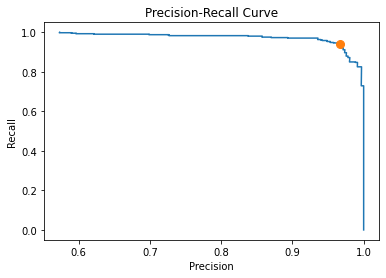

In [11]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
PrecisionRecallCurve(X_test, y_test, X_train, y_train,clf)

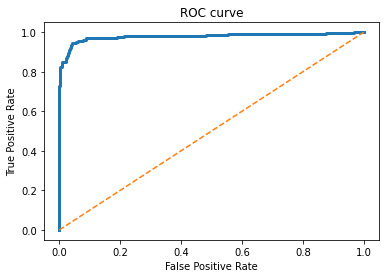

In [12]:
ROCCurve(X_test, y_test, X_train, y_train,clf)

In [13]:
clfrbf = SVC(kernel = 'rbf', gamma = 7,C = 9).fit(X_train, y_train)

print('Accuracy of kernel SVC classifier on training set:',clfrbf.score(X_train, y_train))
print('Accuracy of kernel SVC classifier on test set:',clfrbf.score(X_test, y_test))

svm_predicted1 = clfrbf.predict(X_test)
confusion1 = confusion_matrix(y_test, svm_predicted1)

print('\n Confusion matrix for SVM classifier (RBF kernel, C=9, gamma=7)\n', confusion1)

Accuracy_rbf3, Precision_rbf3, Recall_rbf3, F1_rbf3 = EvaluationMetrics(y_test,svm_predicted1)
print('\n Accuracy:',Accuracy_rbf3,'\n Precision:',Precision_rbf3,'\n Recall:',Recall_rbf3,'\n F1:',F1_rbf3)

Accuracy of kernel SVC classifier on training set: 0.9934944237918215
Accuracy of kernel SVC classifier on test set: 0.9401114206128134

 Confusion matrix for SVM classifier (RBF kernel, C=9, gamma=7)
 [[289  23]
 [ 20 386]]

 Accuracy: 0.9401114206128134 
 Precision: 0.9437652811735942 
 Recall: 0.9507389162561576 
 F1: 0.9472392638036811


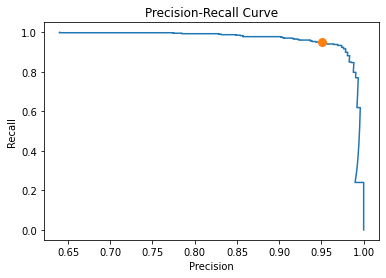

In [63]:
PrecisionRecallCurve(X_test, y_test, X_train, y_train,clfrbf)

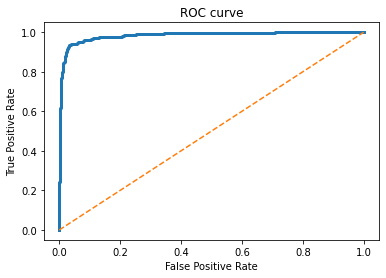

In [64]:
ROCCurve(X_test, y_test, X_train, y_train,clfrbf)

#3 WORD- BOOLEAN

In [15]:
boolean=np.zeros([2870,34196])
for ii in range(2870):
  for jj in range(34196):
    if denselist112[ii][jj]>0.0:
      boolean[ii][jj]=1
    else:
      boolean[ii][jj]=0
X1=boolean
X_trainB, X_testB, y_trainB, y_testB = train_test_split(X1, y, random_state = 0)

clf2 = LinearSVC(C=2).fit(X_trainB, y_trainB)
print('Accuracy of Linear SVC classifier on training set:',clf2.score(X_trainB, y_trainB))
print('Accuracy of Linear SVC classifier on test set:',clf2.score(X_testB, y_testB))

svm_predicted2 = clf2.predict(X_testB)
confusion2 = confusion_matrix(y_testB, svm_predicted2)

print('\n Confusion matrix for SVM classifier (linear, C=2)\n', confusion2)

Accuracy3B, Precision3B, Recall3B, F13B = EvaluationMetrics(y_testB,svm_predicted2)
print('\n Accuracy:',Accuracy3B,'\n Precision:',Precision3B,'\n Recall:',Recall3B,'\n F1:',F13B)

Accuracy of Linear SVC classifier on training set: 1.0
Accuracy of Linear SVC classifier on test set: 0.9818941504178273

 Confusion matrix for SVM classifier (linear, C=2)
 [[303   9]
 [  4 402]]

 Accuracy: 0.9818941504178273 
 Precision: 0.9781021897810219 
 Recall: 0.9901477832512315 
 F1: 0.9840881272949816


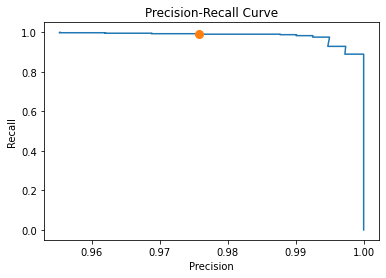

In [16]:
PrecisionRecallCurve(X_testB, y_testB, X_trainB, y_trainB, clf2)

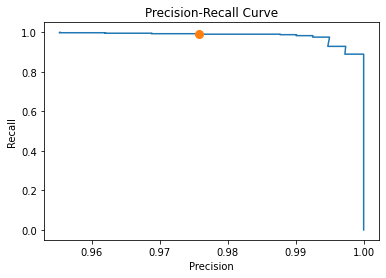

In [17]:
PrecisionRecallCurve(X_testB, y_testB, X_trainB, y_trainB, clf2)

In [18]:
clfrbf2 = SVC(kernel = 'rbf', gamma = 0.1,C = 0.9).fit(X_trainB, y_trainB)

print('Accuracy of Linear SVC classifier on training set:',clfrbf2.score(X_trainB, y_trainB))
print('Accuracy of Linear SVC classifier on test set:',clfrbf2.score(X_testB, y_testB))

svm_predicted11 = clfrbf2.predict(X_testB)
confusion11 = confusion_matrix(y_testB, svm_predicted11)

print('\n Confusion matrix for SVM classifier (RBF kernel, C=0.1, gamma=0.9)\n', confusion11)

Accuracy_rbfB, Precision_rbfB, Recall_rbfB, F1_rbfB = EvaluationMetrics(y_testB,svm_predicted11)
print('\n Accuracy:',Accuracy_rbfB,'\n Precision:',Precision_rbfB,'\n Recall:',Recall_rbfB,'\n F1:',F1_rbfB)

Accuracy of Linear SVC classifier on training set: 1.0
Accuracy of Linear SVC classifier on test set: 0.5710306406685237

 Confusion matrix for SVM classifier (RBF kernel, C=0.1, gamma=0.9)
 [[  4 308]
 [  0 406]]

 Accuracy: 0.5710306406685237 
 Precision: 0.5686274509803921 
 Recall: 1.0 
 F1: 0.725


#CONCLUSION

THE BEST MODEL HAS BEEN FOUND OUT TO BE 3 WORD SEQUENCES AS FEATURE VECTOR AND BOOLEAN OCCURENCE OF CALL WITH LINEAR SUPPORT VECTOR MACHINE ML MODEL

#CLUSTERING

K MEANS

In [ ]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
kk1=[]
for ii in range(np.size(txt_files)):
  s=wordsInFile(txt_files[ii])
  listToStr1 = ' '.join(s)
  kk1.append(listToStr1)
for ii in range(np.size(txt_filesM)):
  s=wordsInFile(txt_filesM[ii])
  listToStr2 = ' '.join(s)
  kk1.append(listToStr2)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(kk1)

In [22]:
true_k = 2
X1=X
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [19]:
s=wordsInFile(txt_filesM[12])
kkb1=' '.join(s)
X12 = vectorizer.transform([kkb1])
predicted = model.predict(X12)
print(predicted)
# CLASS O FOR 'M' & CLASS 1 FOR 'B' FILES

[0]


AGGLOMERATIVE

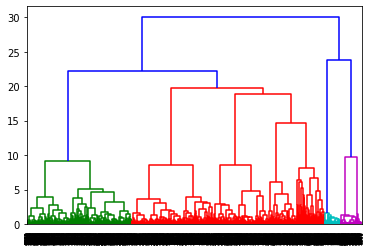

In [25]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.cluster import AgglomerativeClustering

cls = AgglomerativeClustering(n_clusters = 2)
cls_assignment = cls.fit_predict(X1.toarray())

plt.figure()
dendrogram(ward(X1.toarray()))
plt.show()

In [ ]:
cls_assignment

DBSCAN

In [30]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 2, min_samples = 2)
cls = dbscan.fit_predict(X)
cls

array([0, 0, 0, ..., 0, 0, 0])

THE BEST CLUSTERING MODEL IS K MEANS ON THE GIVEN DATASET. THIS IS DUE TO THE GREATER ACCURACY & PRECISION THAT THE MODEL HAS SHOWN